# Term Project Machine Learning

### Import Libraries

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D

### Load Data

In [33]:
#load data
df = pd.read_csv('../data/spotify-2023.csv',encoding='latin-1')
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


### Clean Data

In [34]:
df_copy = df.copy()

In [35]:
df_copy.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [36]:
df_copy.dropna(inplace=True)

In [37]:
df_copy.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

In [38]:
df_copy = df.describe()
df_copy

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [39]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   artist_count          8 non-null      float64
 1   released_year         8 non-null      float64
 2   released_month        8 non-null      float64
 3   released_day          8 non-null      float64
 4   in_spotify_playlists  8 non-null      float64
 5   in_spotify_charts     8 non-null      float64
 6   in_apple_playlists    8 non-null      float64
 7   in_apple_charts       8 non-null      float64
 8   in_deezer_charts      8 non-null      float64
 9   bpm                   8 non-null      float64
 10  danceability_%        8 non-null      float64
 11  valence_%             8 non-null      float64
 12  energy_%              8 non-null      float64
 13  acousticness_%        8 non-null      float64
 14  instrumentalness_%    8 non-null      float64
 15  liveness_%            8 no

In [40]:
df_copy.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,121.056148,1624.919302,124.200002,131.141587,9452.591732,143.823179,239.281708,182.817369,127.712739,216.949775,169.700022,160.238988,166.978706,146.256724,131.748890,141.365529,132.505507
std,336.164605,749.620198,334.903824,332.212027,17768.892327,330.611898,363.099108,323.104674,334.052217,301.987878,317.661589,321.590523,318.958936,327.350114,333.316894,329.305114,332.140511
min,0.893044,11.116218,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,28.057802,14.630610,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,1685.750000,3.424826,8.401462,933.500000,2.250000,28.750000,30.250000,0.000000,91.250000,48.500000,29.870158,43.887631,15.000000,0.000000,11.500000,5.500000
50%,1.278069,2019.119098,6.016789,13.465373,3712.062434,14.004722,77.126833,51.269475,2.333158,121.770199,67.984785,51.215635,65.139559,26.526895,0.790661,15.962117,10.022026
75%,3.500000,2022.000000,9.750000,24.250000,6130.902248,51.431994,234.000000,134.000000,19.026699,156.500000,82.500000,76.750000,82.000000,56.500000,29.057350,42.250000,24.250000
max,953.000000,2023.000000,953.000000,953.000000,52898.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000


In [41]:
df_sorted = df.sort_values(by='streams', ascending=False)

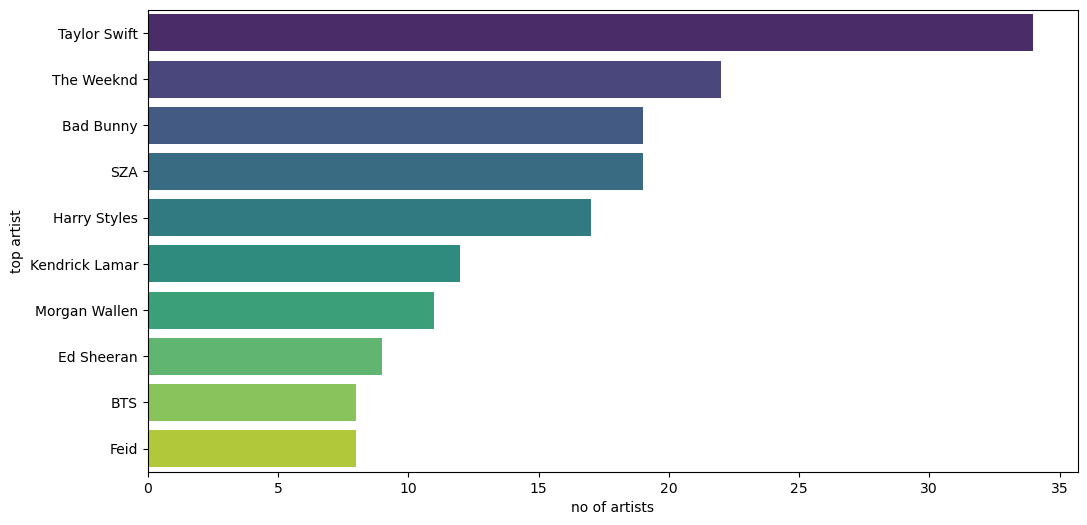

In [42]:
# Assuming you have your DataFrame 'top_10_streamed' prepared correctly
artist_name = df['artist(s)_name'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=artist_name.values, y=artist_name.index, palette='viridis')
plt.xlabel('no of artists')
plt.ylabel('top artist')
plt.show()  # Display the plot

In [43]:
artist_name

Taylor Swift      34
The Weeknd        22
Bad Bunny         19
SZA               19
Harry Styles      17
Kendrick Lamar    12
Morgan Wallen     11
Ed Sheeran         9
BTS                8
Feid               8
Name: artist(s)_name, dtype: int64